Normalized v1: [0.5547002  0.83205029]
Normalized v2: [ 0.9701425  -0.24253563]


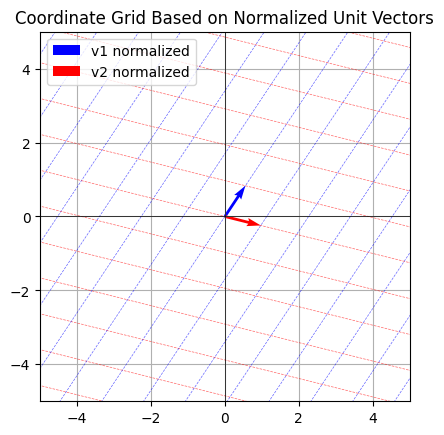

In [24]:
import numpy as np
import matplotlib.pyplot as plt

def normalize_vector(v):
    """Normalizes a given vector."""
    norm = np.linalg.norm(v)
    if norm == 0:
        return v  # Avoid division by zero for zero vectors
    return v / norm

def plot_coordinate_grid(v1, v2, grid_size=5, num_points=20):
    """
    Plots a coordinate grid based on two unit vectors (versors).

    Parameters:
    v1, v2: np.array
        The two vectors (to be normalized) defining the grid.
    grid_size: int
        Defines the range of the grid in both x and y directions.
    num_points: int
        Number of points in the grid lines.
    """
    # Normalize the input vectors
    v1_normalized = normalize_vector(v1)
    v2_normalized = normalize_vector(v2)

    # Print the normalized vectors
    print(f"Normalized v1: {v1_normalized}")
    print(f"Normalized v2: {v2_normalized}")
    
    # Generate more grid lines outside the visible plot area
    extended_grid_size = grid_size * 2
    
    # Generate points for the grid in terms of normalized v1 and v2
    t = np.linspace(-extended_grid_size, extended_grid_size, num_points)
    
    # Create the grid lines in both directions
    for i in range(-extended_grid_size, extended_grid_size + 1):
        # Grid lines along the v1 direction (blue, dashed, thin)
        start_v1 = i * v2_normalized - extended_grid_size * v1_normalized
        end_v1 = i * v2_normalized + extended_grid_size * v1_normalized
        plt.plot([start_v1[0], end_v1[0]], [start_v1[1], end_v1[1]], 'b--', alpha=0.6, linewidth=0.5)

        # Grid lines along the v2 direction (red, dashed, thin)
        start_v2 = i * v1_normalized - extended_grid_size * v2_normalized
        end_v2 = i * v1_normalized + extended_grid_size * v2_normalized
        plt.plot([start_v2[0], end_v2[0]], [start_v2[1], end_v2[1]], 'r--', alpha=0.6, linewidth=0.5)

    # Plot the vectors themselves
    plt.quiver(0, 0, v1_normalized[0], v1_normalized[1], angles='xy', scale_units='xy', scale=1, color='blue', label='v1 normalized')
    plt.quiver(0, 0, v2_normalized[0], v2_normalized[1], angles='xy', scale_units='xy', scale=1, color='red', label='v2 normalized')

    # Set equal scaling and labels
    plt.xlim([-grid_size, grid_size])
    plt.ylim([-grid_size, grid_size])
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.title("Coordinate Grid Based on Normalized Unit Vectors")
    plt.legend()
    plt.show()

# Example: Using non-standard vectors
v1 = np.array([2, 3])  # some arbitrary vector
v2 = np.array([4, -1]) # another arbitrary vector

plot_coordinate_grid(v1, v2)


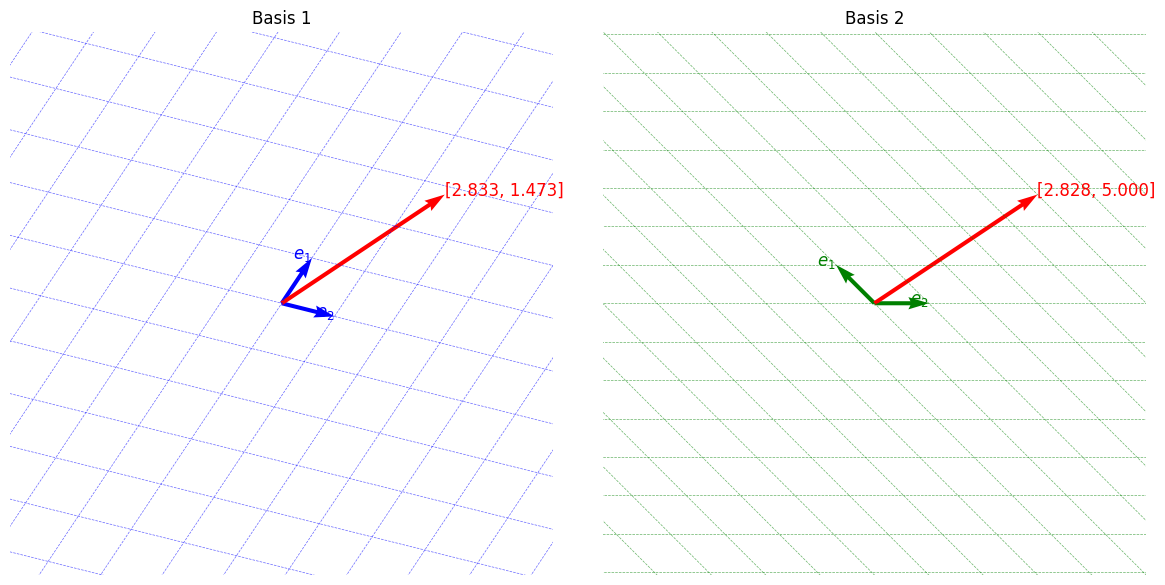

Vector components in basis 1: [2.83293315 1.47253772]
Vector components in basis 2: [2.82842712 5.        ]


In [25]:
import numpy as np
import matplotlib.pyplot as plt

def normalize_vector(v):
    """Normalizes a given vector."""
    norm = np.linalg.norm(v)
    if norm == 0:
        return v  # Avoid division by zero for zero vectors
    return v / norm

def find_components_in_basis(vector, basis1, basis2):
    """Finds the components of the vector in terms of the given basis vectors."""
    # Create a matrix where columns are the basis vectors
    basis_matrix = np.column_stack((basis1, basis2))
    
    # Solve for the components in the new basis
    components = np.linalg.solve(basis_matrix, vector)
    
    return components

def plot_coordinate_grid(ax, v1, v2, grid_size=5, num_points=20, color='b', alpha=0.6):
    """
    Helper function to plot a coordinate grid based on two unit vectors on the given axis.
    """
    extended_grid_size = grid_size * 2
    t = np.linspace(-extended_grid_size, extended_grid_size, num_points)
    
    for i in range(-extended_grid_size, extended_grid_size + 1):
        # Grid lines along the v1 direction
        start_v1 = i * v2 - extended_grid_size * v1
        end_v1 = i * v2 + extended_grid_size * v1
        ax.plot([start_v1[0], end_v1[0]], [start_v1[1], end_v1[1]], linestyle='--', color=color, alpha=alpha, linewidth=0.5)
        
        # Grid lines along the v2 direction
        start_v2 = i * v1 - extended_grid_size * v2
        end_v2 = i * v1 + extended_grid_size * v2
        ax.plot([start_v2[0], end_v2[0]], [start_v2[1], end_v2[1]], linestyle='--', color=color, alpha=alpha, linewidth=0.5)

def plot_side_by_side_systems(v1_basis1, v2_basis1, v1_basis2, v2_basis2, vector, grid_size=5):
    """
    Plots two coordinate systems (left and right) with the same vector on both.
    Displays the components of the vector in both coordinate systems.
    
    Parameters:
    v1_basis1, v2_basis1: np.array
        The two versors of the first coordinate system.
    v1_basis2, v2_basis2: np.array
        The two versors of the second coordinate system.
    vector: np.array
        The vector to be projected and visualized.
    grid_size: int
        Defines the range of the grid for the visualization.
    """
    # Normalize the input vectors (versors)
    v1_basis1_normalized = normalize_vector(v1_basis1)
    v2_basis1_normalized = normalize_vector(v2_basis1)
    v1_basis2_normalized = normalize_vector(v1_basis2)
    v2_basis2_normalized = normalize_vector(v2_basis2)

    # Find the components of the vector in both bases
    vector_components_basis1 = find_components_in_basis(vector, v1_basis1_normalized, v2_basis1_normalized)
    vector_components_basis2 = find_components_in_basis(vector, v1_basis2_normalized, v2_basis2_normalized)

    # Create a figure with two subplots (side by side)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot coordinate system 1 on the left
    plot_coordinate_grid(ax1, v1_basis1_normalized, v2_basis1_normalized, grid_size=grid_size, color='b', alpha=0.6)
    ax1.quiver(0, 0, v1_basis1_normalized[0], v1_basis1_normalized[1], angles='xy', scale_units='xy', scale=1, color='blue', label='v1 basis 1')
    ax1.quiver(0, 0, v2_basis1_normalized[0], v2_basis1_normalized[1], angles='xy', scale_units='xy', scale=1, color='blue', label='v2 basis 1')
    ax1.text(v1_basis1_normalized[0], v1_basis1_normalized[1], '$e_1$', color='blue', fontsize=12, ha='right')
    ax1.text(v2_basis1_normalized[0], v2_basis1_normalized[1], '$e_2$', color='blue', fontsize=12, ha='right')

    # Plot the vector on the left plot (in red)
    ax1.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='red', label='Vector')
    ax1.text(vector[0], vector[1], f'[{vector_components_basis1[0]:.3f}, {vector_components_basis1[1]:.3f}]', color='red', fontsize=12, ha='left')

    # Wyłącz osie na lewym wykresie
    ax1.axis('off')

    ax1.set_xlim([-grid_size, grid_size])
    ax1.set_ylim([-grid_size, grid_size])
    ax1.set_aspect('equal', adjustable='box')
    ax1.set_title('Basis 1')

    # Plot coordinate system 2 on the right
    plot_coordinate_grid(ax2, v1_basis2_normalized, v2_basis2_normalized, grid_size=grid_size, color='g', alpha=0.6)
    ax2.quiver(0, 0, v1_basis2_normalized[0], v1_basis2_normalized[1], angles='xy', scale_units='xy', scale=1, color='green', label='v1 basis 2')
    ax2.quiver(0, 0, v2_basis2_normalized[0], v2_basis2_normalized[1], angles='xy', scale_units='xy', scale=1, color='green', label='v2 basis 2')
    ax2.text(v1_basis2_normalized[0], v1_basis2_normalized[1], '$e_1$', color='green', fontsize=12, ha='right')
    ax2.text(v2_basis2_normalized[0], v2_basis2_normalized[1], '$e_2$', color='green', fontsize=12, ha='right')

    # Plot the same vector on the right plot (in red)
    ax2.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color='red', label='Vector')
    ax2.text(vector[0], vector[1], f'[{vector_components_basis2[0]:.3f}, {vector_components_basis2[1]:.3f}]', color='red', fontsize=12, ha='left')

    # Wyłącz osie na prawym wykresie
    ax2.axis('off')

    ax2.set_xlim([-grid_size, grid_size])
    ax2.set_ylim([-grid_size, grid_size])
    ax2.set_aspect('equal', adjustable='box')
    ax2.set_title('Basis 2')

    # Display the plot
    plt.tight_layout()
    plt.show()

    # Print the components of the vector in both bases
    print(f"Vector components in basis 1: {vector_components_basis1}")
    print(f"Vector components in basis 2: {vector_components_basis2}")

# Example: Using non-standard vectors and a vector in space
v1_basis1 = np.array([2, 3])  # first versor of basis 1
v2_basis1 = np.array([4, -1]) # second versor of basis 1
v1_basis2 = np.array([-1, 1])  # first versor of basis 2
v2_basis2 = np.array([1, 0])  # second versor of basis 2

vector = np.array([3, 2])  # Vector in the original space (the same vector in both systems)

plot_side_by_side_systems(v1_basis1, v2_basis1, v1_basis2, v2_basis2, vector)
